In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
from IPython.display import display, Math
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()

from optimize_funcs import *

# OPTIMIZE

In [2]:
label = 'd_ce'
b, b_true = setup_bundle_wrong(label)

In [3]:
ecc = 0.12
per0 = 1.3454511249399856
esinw = ecc*np.sin(per0)
ecosw = ecc*np.cos(per0)

100%|██████████| 1/1 [00:00<00:00, 24.79it/s]


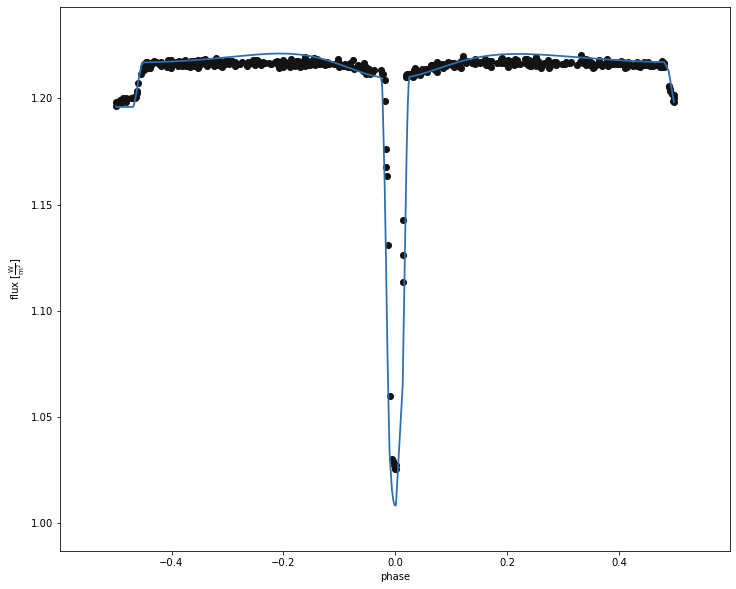

In [8]:
b = update_vals(b, 
                ['incl@binary', 'requivsumfrac', 'requivratio', 'teffratio', 'esinw', 'ecosw'], 
                [89., 0.18, 0.37, 0.7, 0.14, 0.025],
               'ellcbnd')

In [9]:
b.save('data/%s_manual_wrong.bundle' % label)

'data/d_ce_manual_wrong.bundle'

### optimize full

In [15]:
label = 'ce_nm_wrong'
b = phoebe.load('data/d_ce_manual_wrong.bundle')

In [16]:
#b_true['teff@primary']
b['teff@primary'] = 10000
b['q'] = 0.4
b['sma@binary'] = 15

499500it [25:17, 594.62it/s]                      
100%|██████████| 1/1 [00:00<00:00, 15.83it/s]


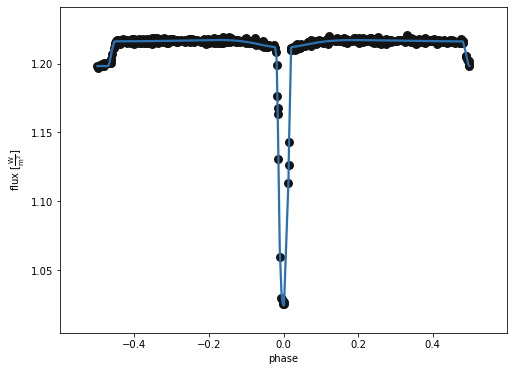

In [17]:
# b=optimize_params(b, ['incl@binary', 'teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw'], 'full', 'ellcbnd', optimizer='nm',  plot=True)
b=optimize_params(b, ['incl@binary', 'teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw', 'teff@primary', 'sma@binary', 'q'], 'full', 'ellcbnd', optimizer='nm',  plot=True)

In [18]:
# b.save('data/%s_full.bundle' % label)
b.save('data/ce_nm_wrong_optimizeall.bundle')

'data/ce_nm_wrong_optimizeall.bundle'

499500it [25:30, 594.62it/s]

# MCMC

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe

from optimize_funcs import *


100%|██████████| 1/1 [00:00<00:00, 22.33it/s]


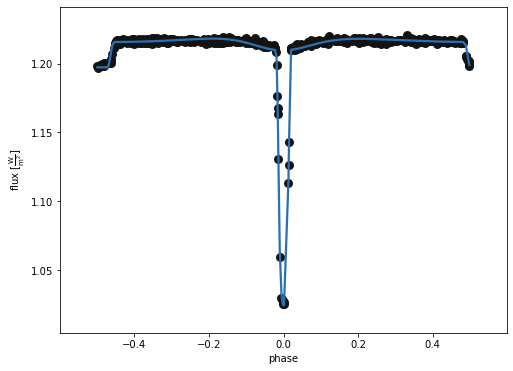

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [14]:
b = phoebe.load('data/ce_nm_wrong_full.bundle')
b.run_compute(compute='ellcbnd', model='latest')
b.plot(['dataset', 'latest'], x='phase',show=True)

In [15]:
params0 = np.array(['incl@binary', 'teffratio', 'requivsumfrac', 'requivratio', 'esinw', 'ecosw'])
priors0 = np.array([[50,90], [0.01,10], [0.0001, 1.], [0.1,10], [-1,1], [-1,1]])

params_teff1_sma_q_p_t0 = np.array(['incl@binary', 'teffratio', 'requivsumfrac', 'requivratio', 'esinw', 'ecosw', 
                                'teff@primary',
                                'sma@binary', 'q',
                                'period@binary', 't0_supconj'])
priors_teff1_sma_q_p_t0 = np.array([[50,90], [0.01,10], [0.0001, 1.], [0.1,10], [-1,1], [-1,1], 
                        [3500,20000],
                        [5,50], [0.1,10],
                        [np.nan,np.nan], [np.nan,np.nan]])

In [16]:
b=add_dist_solver_export(b,params0, priors0, 'ce_wrong', '0')
b=add_dist_solver_export(b,params_teff1_sma_q_p_t0, priors_teff1_sma_q_p_t0, 'ce_wrong', 'teff1_sma_q_p_t0')

In [17]:
b.save('data/ce_nm_wrong_dists.bundle')

'data/ce_nm_wrong_dists.bundle'

269011it [12:02, 1062.12it/s]